# **Project Name** - Hotel Booking Analysis

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**Muhammad Adnan

# **Project Summary -**

The hotel wants to understand more about how people book rooms and what influences their decisions. We have a big list of information about bookings, like when they were made, who the guests are, and if they were canceled. We want to figure out patterns and trends in this data to help the hotel make better decisions and improve their services. For example, we want to know when the best time to book a room is, what type of rooms guests prefer, and if certain factors increase the chances of a booking being canceled. The goal is to use this information to enhance the hotel's overall experience for guests and make smarter business decisions.

# **GitHub Link -**

# **Problem Statement**

The hotel wants to understand more about how people book rooms and what influences their decisions. We have a big list of information about bookings, like when they were made, who the guests are, and if they were canceled. We want to figure out patterns and trends in this data to help the hotel make better decisions and improve their services. For example, we want to know when the best time to book a room is, what type of rooms guests prefer, and if certain factors increase the chances of a booking being canceled. The goal is to use this information to enhance the hotel's overall experience for guests and make smarter business decisions.

#### **Define Your Business Objective?**

Our main goal is to enhance the hotel experience for guests and boost overall success. By analyzing how people book rooms and studying various factors like booking patterns, guest preferences, and cancellation trends, we aim to improve our services. The ultimate objective is to use this knowledge to make informed decisions that not only benefit our guests but also contribute to the hotel's overall growth and success in the hospitality industry.

# ***Let's Begin !***

## ***1. Know Your Data***


In [ ]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### Dataset Loading

In [ ]:
# Load the Hotel Booking dataset
data=pd.read_csv(r"/Hotel Bookings.csv")

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(66448, 32)

### Dataset Information

In [ ]:
# Dataset Info
## There are 119390 rows and 32 columns.

#### Duplicate Values

In [ ]:
data[data.duplicated()].shape

(17992, 32)

There are 31994 duplicate rows in the dataset. We will remove the dupliates by using the following Python code.

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(48456, 32)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data[data.isnull()].shape

(48456, 32)

There are 40359 which contain atleast one NA.

company                           94.269028
agent                             15.331435
country                            0.928678
children                           0.008255
reservation_status_date            0.002064
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
previous_cancellations             0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
deposit_type                       0.000000
booking_changes                    0.000000
reservation_status                 0.000000
assigned_room_type                 0.000000
reserved_room_type                 0.000000
previous_bookings_not_canceled     0.000000
hotel                              0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

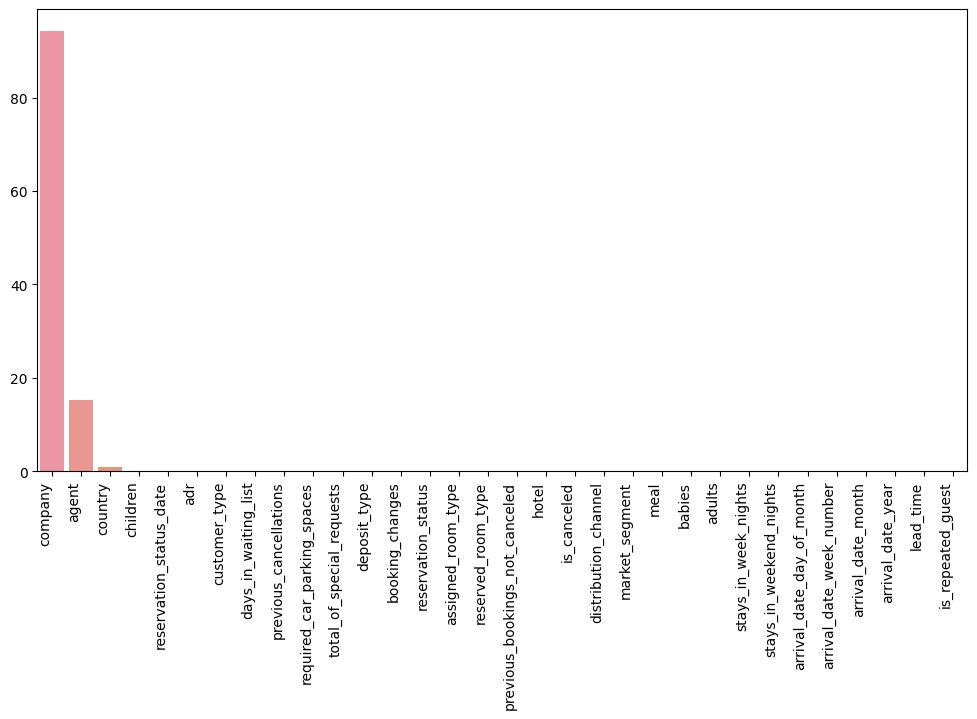

In [ ]:
# Visualizing the missing values
missing_percentage = (data.isnull().mean() * 100).sort_values(ascending=False)
print(missing_percentage)
# Plot a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xticks(rotation=90, ha='right')
plt.show()

The chart reveals that the "company" feature has a very high percentage of missing values (93.45%), followed by "agent" with 17.52%. Other features like "country," "children," and "reservation_status_date" also have some missing values.

### What did you know about your dataset?
*   There are 119390 rows and 32 columns in the dataset
*   There are 31994 duplicate rows in the dataset.
*   There are 40359 which contain atleast one NA.
*   The "company" feature has a very high percentage of missing values (93.45%), followed by "agent" with 17.52%. Other features like "country," "children," and "reservation_status_date" also have some missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
print(data.describe(exclude=["O"]))   # We are excluding thpse faetures whose dtypeis Object.

        is_canceled     lead_time  arrival_date_year  \
count  48456.000000  48456.000000       48456.000000   
mean       0.386928     82.976061        2016.085129   
std        0.487052     88.485102           0.698715   
min        0.000000      0.000000        2015.000000   
25%        0.000000     12.000000        2016.000000   
50%        0.000000     52.000000        2016.000000   
75%        1.000000    131.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              48456.000000               48456.000000   
mean                  27.146772                  15.757161   
std                   14.110555                   8.837733   
min                    1.000000                   1.000000   
25%                   15.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   

In [ ]:
# Check Unique Values for each variable.
class Get_Unique_Extractor:
  def __init__(self,data):
    self.data=data
    self.unique_values={}
  def get_unique_values(self):
    for column in data.columns:
      self.unique_values[column]=self.data[column].unique()
    return self.unique_values
get_value_ext=Get_Unique_Extractor(data)
unique_values_dict=get_value_ext.get_unique_values()


In [ ]:
for key,value in unique_values_dict.items():
  print(key,"--",value)
  print("*"*100)

hotel -- ['Resort Hotel' 'City Hotel']
****************************************************************************************************
is_canceled -- [0 1]
****************************************************************************************************
lead_time -- [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323

## 3. ***Data Wrangling***

### Data Wrangling Code

 #### Handle **Missing** Values:

In [ ]:
# Percentage of missing values in each feature
print(missing_percentage)

company                           94.269028
agent                             15.331435
country                            0.928678
children                           0.008255
reservation_status_date            0.002064
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
previous_cancellations             0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
deposit_type                       0.000000
booking_changes                    0.000000
reservation_status                 0.000000
assigned_room_type                 0.000000
reserved_room_type                 0.000000
previous_bookings_not_canceled     0.000000
hotel                              0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

As we can see there are four features company, agent, country and children which have missing values in them. We can handle each column one by one.


In [ ]:
"""First, let's address the 'company' column. Given that a significant portion of
   values in this column is missing, the exact reason remains unclear. One plausible
   explanation could be that individuals may not have utilized company-based booking
   services. Instead, they might have opted to directly approach hotels or communicated
   with them directly to secure a room reservation. Therefore we can drop the column from the dataset as
   it is not providing an information of paramount importance."""

data.drop(columns=["company"],inplace=True)



Let us have a look at "agent" column.

In [ ]:
# Percentage of missing values in agent column.
data.agent.isnull().mean()*100

15.331434703648672

In [ ]:
# Look at value counts
pd.DataFrame(data.agent.value_counts())

,agent
240.0,13021
9.0,9558
250.0,2778
241.0,1644
40.0,963
...,...
93.0,1
151.0,1
446.0,1
472.0,1


As we can see that the agent with ID 9 has done most of the bookings, we can replace the missing places with this ID.

In [ ]:
# Impute missing values in the 'agent' column using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
data['agent'] = imputer.fit_transform(data[['agent']])

Let us look at the 'children' column

In [ ]:
# Value counts of children column
data.children.value_counts()

0.0     43591
1.0      2542
2.0      2289
3.0        29
10.0        1
Name: children, dtype: int64

In [ ]:
# Missing values in column 'children'
data.children.isnull().mean()*100

0.008254911672445105

Considering the extremely low percentage of missing values in the 'children' column, we have two viable options for handling them. We can either opt to remove the rows containing missing values or replace the missing values with the mode of the same column.


In [ ]:
# Replace null values in children column with the most frequent one
data['children'] = imputer.fit_transform(data[['children']])

Now let us come for the 'country' column

In [ ]:
data["country"]=imputer.fit_transform(data[["country"]])

Let's check if there are any rows where the counts of adults, children, and babies are all zero.


In [ ]:
data[(data['adults']==0) & (data ['children']==0) & (data['babies']==0)].shape

(35, 31)

It's possible that these rows contain data entry errors or missing . We need to remove them.

In [ ]:
data.drop(data[(data['adults'] == 0) & (data['children'] == 0) & (data['babies'] == 0)].index, inplace=True)


### Converting columns into appropirate data types

We will convert columns **adults**, **children** and **babies** into **int** data type as they are in **float**.

In [ ]:
data[["adults","children","babies"]]=data[["adults","children","babies"]].astype(int)

Now we will convert **reservation_status_date** into **date_time** data type as it is in **object**.

In [ ]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

### Adding Important columns and creating new columns

We will add the values of **stays_in_weekend_nights** and **stays_in_week_nights**. Adding theses column  can provide insights into the total length of stay for each booking.

In [ ]:
data["total_stay"]=data.stays_in_weekend_nights+data.stays_in_week_nights

Similarly, adding the counts of **adults**, **children**, and **babies** can give you the total number of guests.

In [ ]:
data["total_guests"]=data.adults+data.children+data.babies

We can create a new column of arrival by combining 'arrival_date_day_of_month', 'arrival_date_month' and
'arrival_date_year'.

In [ ]:
#convert month name to number then create new arrival date column by combining year month date
data['arrival_date_month'] = pd.to_datetime(data['arrival_date_month'] , format='%B').dt.month
data['arrival_date'] = pd.to_datetime(dict(year=data.arrival_date_year, month=data.arrival_date_month, day=data.arrival_date_day_of_month))

### Convert columns values

We can see some confusing values like TA/TO and BB, FB, HB, we will replaced it so it will be easier for us to conduct further analysis.
Here are the meaning of each term:
- TA/TO : Travel Agents/Tour Operators
- SC : Self-catering, which means no meals are included, but the accommodation may have facilities for cooking light meals
- BB: Bed and breakfast, which includes breakfast
- HB: Half board, which includes breakfast and dinner, but no evening drinks
- FB: Full board, which includes breakfast, lunch, and dinner, but no evening drinks

In [ ]:
data['distribution_channel'].value_counts()

TA/TO        37692
Direct        7962
Corporate     2732
GDS             30
Undefined        5
Name: distribution_channel, dtype: int64

As we can see TA/TO is the most frequent value in distribution_channel,
therefore, we will underfined by TA/TO in the same column.

In [ ]:
#replace TA/TO with Undefined in distribution_channel column
data["distribution_channel"]=imputer.fit_transform(data[["distribution_channel"]])

Similarly we will deal with 'meal' column.

In [ ]:
#replace Undefined, BB, FB, HB, SC to its meaning.
data["meal"].value_counts()

BB           37904
HB            7089
SC            2584
Undefined      492
FB             352
Name: meal, dtype: int64

In [ ]:
#replace Undefined by the most frequent value among BB, FB, HB and SC and also replace BB, FB, HB and SC by thier meanings.
data['meal'].replace( "Undefined", "BB",inplace = True)

data.replace(["BB", "FB", "HB", "SC"],["Breakfast","Half Board","Full Board","self Catering"],inplace=True)

In [ ]:
data.meal.value_counts()

Breakfast        38396
Full Board        7089
self Catering     2584
Half Board         352
Name: meal, dtype: int64

**Data Wrangling Summary:**

#### 1. Handling Missing Values:
   - Dropped 'company' column due to significant missing values.
   - Imputed missing values in 'agent', 'children', and 'country.'

#### 2. Handling Zero Guest Entries:
   - Removed rows with zero adults, children, and babies.

#### 3. Data Type Conversion:
   - Converted 'adults', 'children', and 'babies' to integers.
   - Converted 'reservation_status_date' to datetime.

#### 4. Feature Engineering:
   - Created 'total_stay' and 'total_guests' features.

#### 5. Handling Distribution Channel:
   - Imputed missing values in 'distribution_channel.'

#### 6. Handling Meal Column:
   - Standardized 'meal' column values.

#### 7. Date Transformation:
   - Converted month names to numbers.
   - Created 'arrival_date' from year, month, and day.

**Insights:**
- 'Company' column lacked crucial data, likely indicating low usage.
- Identified and removed incomplete bookings with zero guests.
- Introduced new features for stay duration and total guests.
- Standardized and clarified 'meal' column values.
- Enhanced date handling for better analysis.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

We can start this section by looking at the correlation heatmap between the numerical variables.

In [ ]:
# Let us gather all the numeric variables
numeric_columns=[]
for col in data.columns:
  if data[col].dtype=="int" or data[col].dtype=="float" :
    numeric_columns.append(col)
print(numeric_columns)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_stay', 'total_guests']


<Axes: >

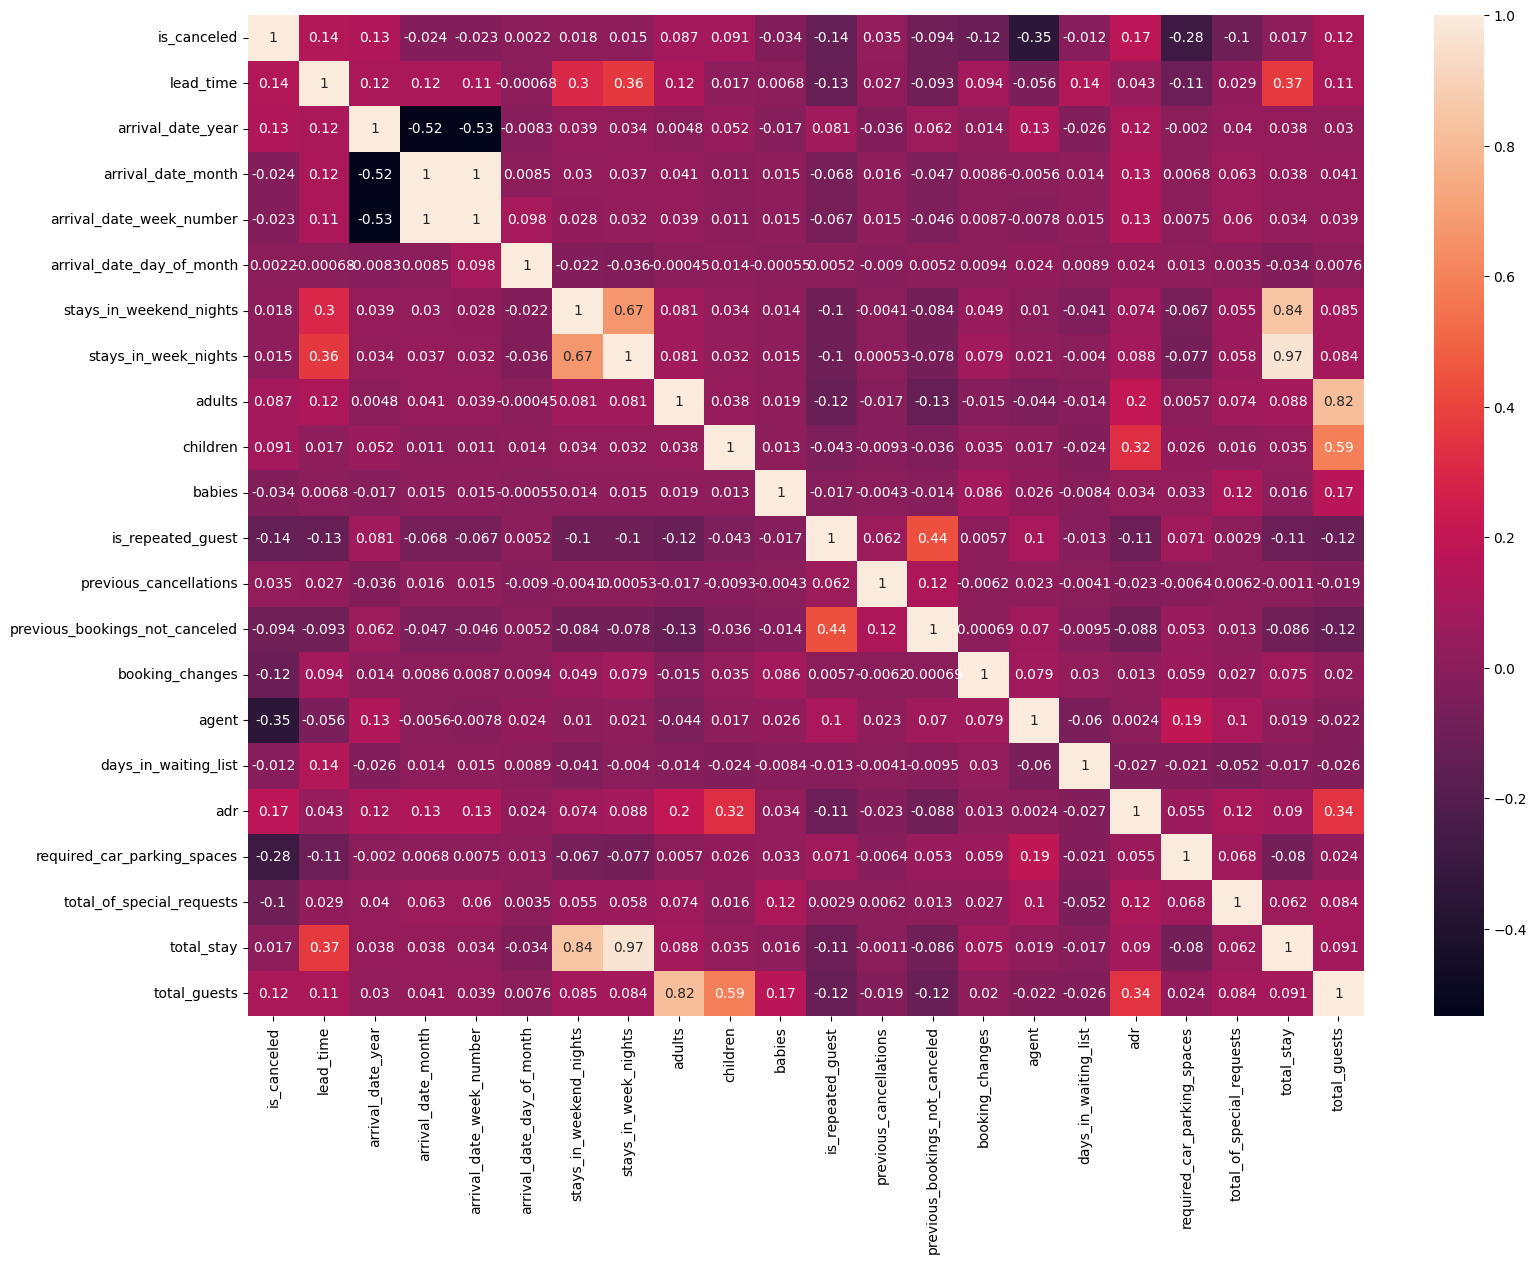

In [ ]:
# Let us explore the heatmap of the numeric variables
corr_matrix=data[numeric_columns].corr()
plt.figure(figsize=(18,13))
sns.heatmap(corr_matrix,annot=True)


We will examine all possible combinations of numerical columns to uncover interesting insights. To streamline our focus, we have set a correlation threshold of 0.30. In other words, we will only consider features with a correlation exceeding 0.30 for further analysis.

In [ ]:
for col1 in numeric_columns:
  for col2 in numeric_columns:
    if col1!=col2:
      correlation=data[[col1,col2]].corr().iloc[0,1]
      if correlation>=0.30:
        print(f"Correlation between {col1} and {col2} is {correlation}")


Correlation between lead_time and stays_in_week_nights is 0.36230775919570946
Correlation between lead_time and total_stay is 0.36802891705024576
Correlation between arrival_date_month and arrival_date_week_number is 0.9954351577424816
Correlation between arrival_date_week_number and arrival_date_month is 0.9954351577424816
Correlation between stays_in_weekend_nights and stays_in_week_nights is 0.6715207615734691
Correlation between stays_in_weekend_nights and total_stay is 0.8406007566008283
Correlation between stays_in_week_nights and lead_time is 0.36230775919570946
Correlation between stays_in_week_nights and stays_in_weekend_nights is 0.6715207615734693
Correlation between stays_in_week_nights and total_stay is 0.9658396478328743
Correlation between adults and total_guests is 0.8169646970962985
Correlation between children and adr is 0.3249994517407002
Correlation between children and total_guests is 0.5886496454560755
Correlation between is_repeated_guest and previous_bookings_no

**Insights**
- The correlation between "total_stay" and "stays_in_weekend_nights" is 0.8406007566008283 while the corelation between "total_stay" and "stays_in_week_nights" is 0.9658396478328742. The higher correlation of 0.9658 between 'total_stay' and 'stays_in_week_nights' suggests stronger positive relationship. This indicates that the majority of the total stay duration is contributed by the number of nights booked on weekdays.

- The number of 'adults' is highly correlated with 'total_guests', indicating that the majority of guests are adults.

- The variables 'total_guests' and 'adr' are slighly positively correlated. More guests often lead to higher room rates (ADR) due to larger room types or added amenities. This positive correlation highlights how adjusting room configurations and pricing strategies for larger groups can boost revenue per room night, positively impacting overall ADR.

Let us move forward towards **Univariate Analysis** and answer some of the revelant questions.